# Naive Bayes Algorithm

Naive bayes algorithm is based on the principle of Bayes theorem from probablity, which in turn is based on condintional probablity. It states that:

P(Ck|X) = (P(X|Ck) * P(Ck)) / P(X)

where 
Ck : Classes for the classification

X : Input data points (X1,X2,X3 ..... Xn)

Naive Bayes has one simple assumption that all the features are independent of each other.

In [0]:
import pandas as pd
import numpy as np

In [0]:
# Loading the dataset using pandas
train_df = pd.read_csv('./spooky_author_train.csv')

# Checking the first few rows
print(train_df.head()) 

        id                                               text author
0  id26305  This process, however, afforded me no means of...    EAP
1  id17569  It never once occurred to me that the fumbling...    HPL
2  id11008  In his left hand was a gold snuff box, from wh...    EAP
3  id27763  How lovely is spring As we looked from Windsor...    MWS
4  id12958  Finding nothing else, not even gold, the Super...    HPL


In [0]:
# Checking the total missing data

print(train_df.isnull().sum())

id        0
text      0
author    0
dtype: int64


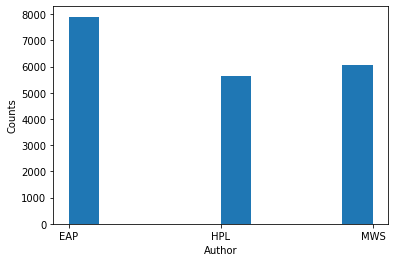

In [0]:
# checking for class imbalance 
import matplotlib.pyplot as plt

plt.hist(train_df.author)
plt.xlabel('Author')
plt.ylabel('Counts')
plt.show()

From the histograms plot we can see the classes are fairly balanced

In [0]:
# Cleaning the text

import nltk
import re
from nltk.corpus import stopwords

In [0]:
train_corpus = []
for item in train_df.text:
  item = re.sub('[^a-zA-Z0-9]',' ',item)
  item = item.lower()
  train_corpus.append(item)

In [0]:
X = np.array(train_corpus)
Y = np.array(train_df.author)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,f1_score

train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=42,test_size=0.2)

#Creating of pipeline for all the steps to be taken the text
classifier = Pipeline([
                       ('vectorizer',CountVectorizer()),
                       ('tfidf',TfidfTransformer()),
                       ('clf',MultinomialNB()),
])

In [0]:
classifier.fit(train_X,train_Y)
pred_Y = classifier.predict(test_X)

print('Accuracy: ',accuracy_score(test_Y,pred_Y))
print('F1: ',f1_score(test_Y,pred_Y,average=None))

Accuracy:  0.8143513789581205
F1:  [0.81779541 0.78006501 0.83516484]


In [0]:
# Parameter tuning with grid search
from sklearn.model_selection import GridSearchCV

parameters = {
    'vectorize  r__ngram_range' : [(1,1),(1,2),(1,3)],
    'vectorizer__stop_words' : ('english',None),
    'tfidf__norm' : ('l1','l2'),
    'tfidf__use_idf' : ('True','False'),
    'clf__alpha' : (0,0.01,0.001,0.5,0.05,0.3,1)
}

grid_classifier = GridSearchCV(classifier,parameters)
grid_classifier.fit(train_X,train_Y)
pred_Y = grid_classifier.predict(test_X)

print('Accuracy: ',accuracy_score(test_Y,pred_Y))
print('F1: ',f1_score(test_Y,pred_Y,average=None))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/nai

Accuracy:  0.8493360572012257
F1:  [0.84987437 0.83750614 0.85790885]
